### What is the safest neighborhood in San Francisco?

Now let's look at the second question of interest. That is - What is the safest neighborhood in San Francisco? And the least safe?

Again, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [2]:
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [128]:
# Let's see how many crimes are in each district
districtCrimes = df[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().sort_values(by = ['Category'], ascending = False)
districtCrimesSum = districtCrimes[['Category']].sum()
districtCrimes.head(25)

,Category
PdDistrict,
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922


In [129]:
districtCrimes['Percentage'] = districtCrimes['Category']/np.sum(districtCrimes['Category'])*100
districtCrimes.head()

,Category,Percentage
PdDistrict,,
SOUTHERN,28445,18.900458
NORTHERN,20100,13.355570
MISSION,19503,12.958890
CENTRAL,17666,11.738284
BAYVIEW,14303,9.503718


In [130]:
districtCrimes.rename(columns = {'Category':'Number of Crimes'}, inplace = True)
districtCrimes.head()

,Number of Crimes,Percentage
PdDistrict,,
SOUTHERN,28445,18.900458
NORTHERN,20100,13.355570
MISSION,19503,12.958890
CENTRAL,17666,11.738284
BAYVIEW,14303,9.503718


In [131]:
districts = ('SOUTHERN', 'NORTHERN', 'MISSION', 'CENTRAL', 'BAYVIEW', 'INGLESIDE', 'TARAVAL', 'TENDERLOIN', 'RICHMOND', 'PARK')
districtCrimes['District'] = districts;
districtCrimes.head(20)

,Number of Crimes,Percentage,District
PdDistrict,,,
SOUTHERN,28445,18.900458,SOUTHERN
NORTHERN,20100,13.355570,NORTHERN
MISSION,19503,12.958890,MISSION
CENTRAL,17666,11.738284,CENTRAL
BAYVIEW,14303,9.503718,BAYVIEW
INGLESIDE,11594,7.703706,INGLESIDE
TARAVAL,11325,7.524967,TARAVAL
TENDERLOIN,9942,6.606024,TENDERLOIN
RICHMOND,8922,5.928279,RICHMOND


Text(0.5, 1.0, 'Crime distribution by district')

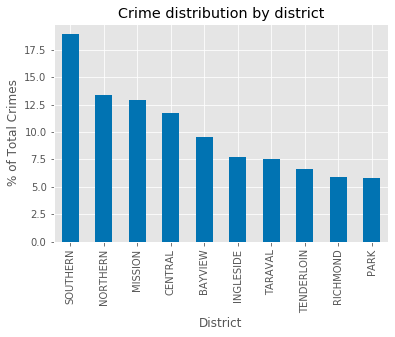

In [132]:
# Show number of crimes per district
# Create bars

crimeDistrictPlot = districtCrimes.plot.bar('District', 'Percentage', legend = False)
crimeDistrictPlot.set_ylabel('% of Total Crimes')
crimeDistrictPlot.set_title('Crime distribution by district')

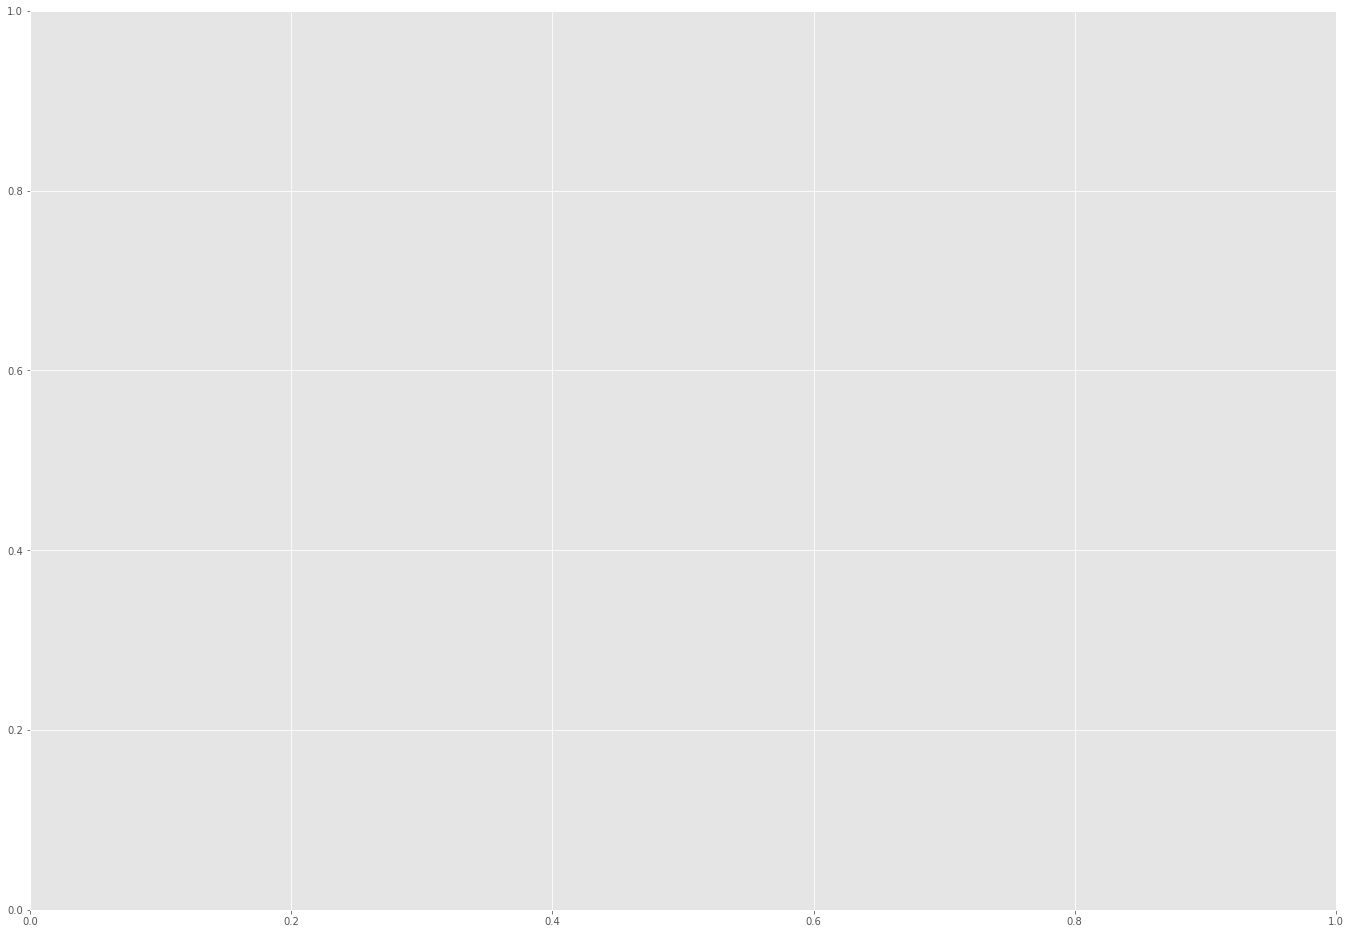

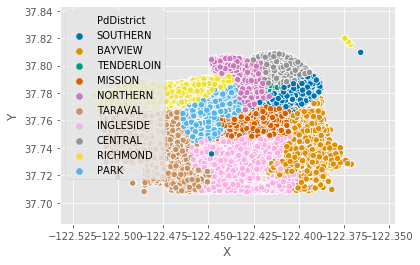

In [138]:
# Map of crimes
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize = a4_dims)
fig, ax = plt.subplots()
crimeMap = sns.scatterplot(x = 'X', y = 'Y', data = df, hue = 'PdDistrict', s = 40)
crimeMap.set_xlabel = 'Longitude [º]'
crimeMap.set_ylabel = 'Latitude [º]'

plt.show()

In [138]:
df[['DayOfWeek', 'Category', 'PdDistrict']].groupby(['DayOfWeek', 'PdDistrict']).agg(['count'])

Category
                        count
DayOfWeek PdDistrict         
Friday    BAYVIEW        2180
          CENTRAL        2876
          INGLESIDE      1826
          MISSION        2905
          NORTHERN       3107
...                       ...
Wednesday PARK           1330
          RICHMOND       1316
          SOUTHERN       3979
          TARAVAL        1631
          TENDERLOIN     1476

[70 rows x 1 columns]

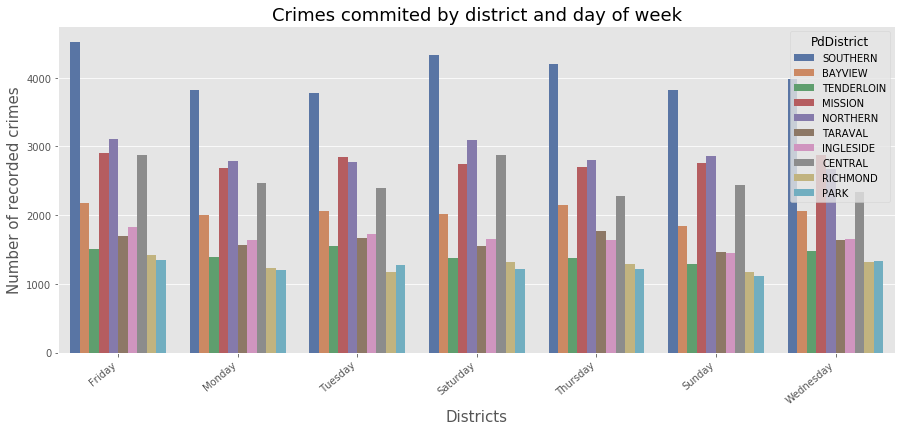

In [139]:
#Show number of crimes per district and day of week
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'DayOfWeek', hue = 'PdDistrict', data = df)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by district and day of week', fontsize=18)

plt.show()

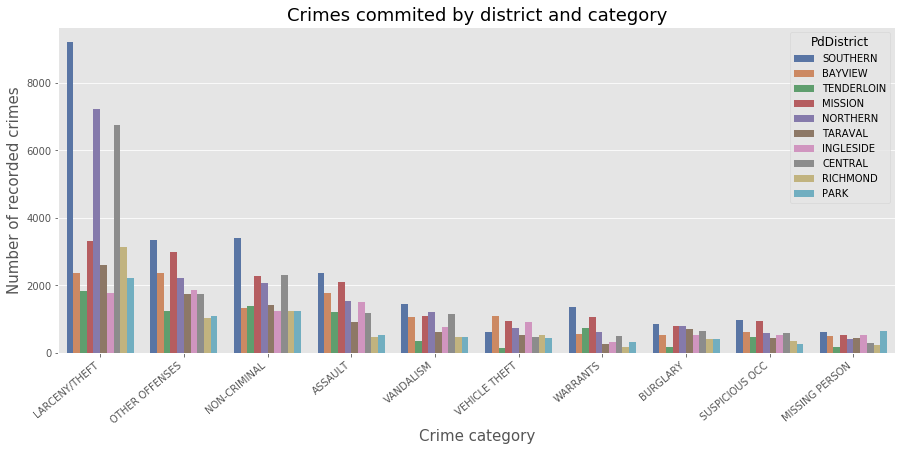

In [140]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'Category', hue = 'PdDistrict', data = df, order = df.Category.value_counts().iloc[:10].index)

#set the axes
ax.set_xlabel('Crime category', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by district and category', fontsize=18)

plt.show()

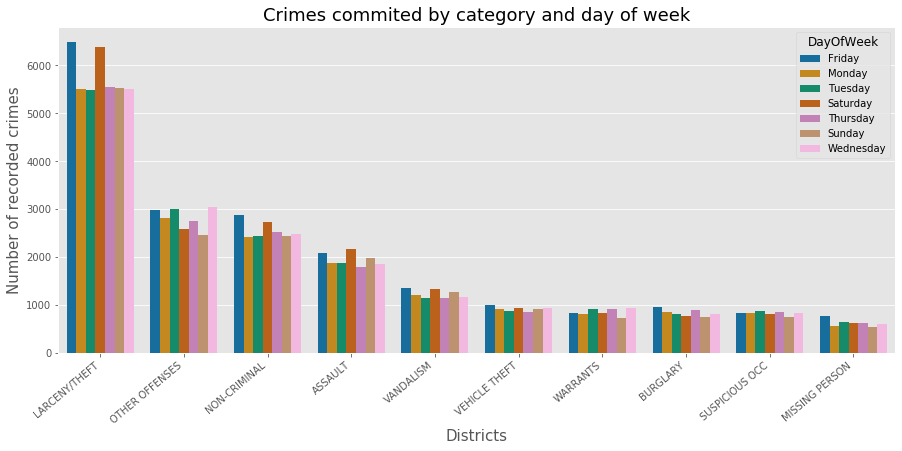

In [125]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'Category', hue = 'DayOfWeek', data = df, order = df.Category.value_counts().iloc[:10].index)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by category and day of week', fontsize=18)

plt.show()

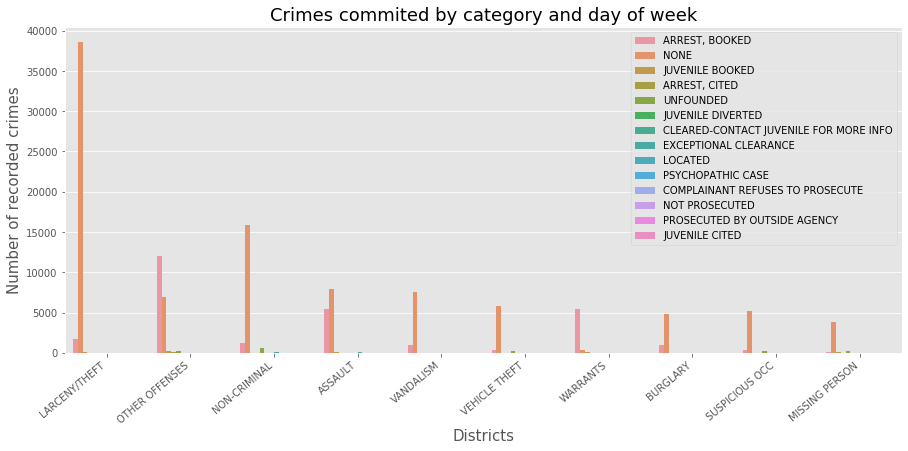

In [127]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'Category', hue = 'Resolution', data = df, order = df.Category.value_counts().iloc[:10].index)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by category and day of week', fontsize=18)
plt.legend(loc='upper right')

plt.show()

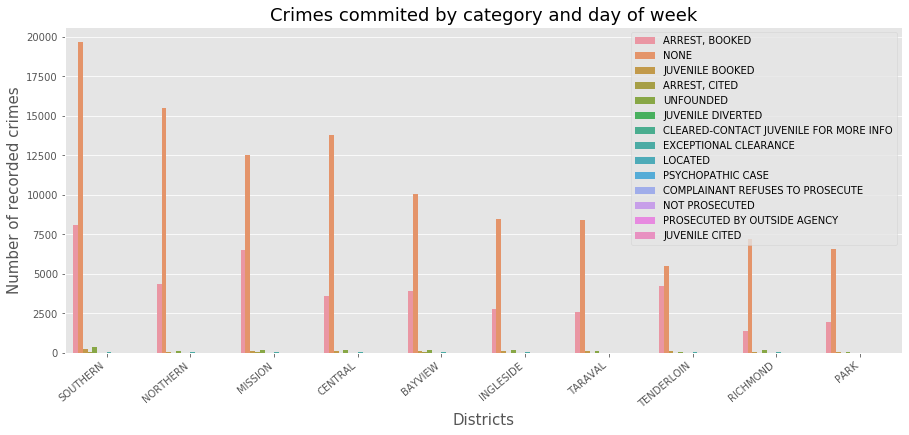

In [129]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
sns.set_palette('colorblind')
ax = sns.countplot(x = 'PdDistrict', hue = 'Resolution', data = df, order = df.PdDistrict.value_counts().iloc[:].index)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by category and day of week', fontsize = 18)
plt.legend(loc='upper right')

plt.show()

In [11]:
study_df

,method,count,perc
12,Take online courses,15246,0.209432
1,Buy books and work through the exercises,11750,0.161408
8,Part-time/evening courses,7517,0.103260
3,Contribute to open source,7423,0.101968
0,Bootcamp,5276,0.072476
2,Conferences/meet-ups,5244,0.072036
11,Return to college,5017,0.068918
10,Participate in online coding competitions,3610,0.049590
4,Get a job as a QA tester,3376,0.046376
9,Participate in hackathons,2747,0.037735


Although we can see the mean salary is highest for the individuals who say that you should contribute to open source, you might be asking - is that really a significant difference?  The salary differences don't see that large...

By the Central Limit Theorem, we know that the mean of any set of data will follow a normal distribution with a standard deviation equal to the standard deviation of the original data divided by the square root of the sample size, as long as we collect a large enough sample size.  With that in mind, we can consider two salaries significantly different if a second salary is two standard deviations or more away from the other.

Using the lower and upper bound components, we can get an idea of the salaries that are significantly different from one another.   

In [12]:
# Quiz - perform a similar analysis looking at career and job satisfaction for this individuals
# to determine which you want to be like

In [15]:
df_jobsat = mean_amt(df, 'CousinEducation', 'JobSatisfaction', possible_vals)

In [16]:
df_jobsat.sort_values('mean_col', ascending=False)

,CousinEducation,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
9,Participate in hackathons,14884.0,2073,115166.0,7.179932,4.003804,2.000951,7.093795,7.266070
7,Other,13797.0,1937,106521.0,7.122870,4.257489,2.063368,7.030980,7.214760
11,Return to college,27767.0,3904,212971.0,7.112449,3.965070,1.991248,7.049985,7.174912
4,Get a job as a QA tester,21294.0,3000,162716.0,7.098000,3.857063,1.963941,7.027721,7.168279
3,Contribute to open source,42374.0,5999,324340.0,7.063511,4.172496,2.042669,7.011820,7.115202
2,Conferences/meet-ups,30868.0,4371,236106.0,7.062000,4.144635,2.035838,7.001645,7.122354
0,Bootcamp,30404.0,4307,231670.0,7.059206,3.956792,1.989169,6.999799,7.118613
1,Buy books and work through the exercises,66788.0,9492,508944.0,7.036241,4.109517,2.027194,6.995459,7.077023
8,Part-time/evening courses,42797.0,6100,324829.0,7.015902,4.027780,2.006933,6.965537,7.066266
12,Take online courses,85746.0,12222,651056.0,7.015709,4.049009,2.012215,6.980035,7.051384


In [26]:
pd.DataFrame(np.hstack([df_jobsat, df_all]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Bootcamp,30404,4307,231670,7.05921,3.95679,1.98917,6.9998,7.11861,Bootcamp,9.58323e+07,1622,8.50299e+12,59082.8,1.75151e+09,41851,57046,61119.5
1,Buy books and work through the exercises,66788,9492,508944,7.03624,4.10952,2.02719,6.99546,7.07702,Buy books and work through the exercises,1.90993e+08,3393,1.62499e+13,56290.2,1.62064e+09,40257.2,54935.6,57644.8
2,Conferences/meet-ups,30868,4371,236106,7.062,4.14463,2.03584,7.00165,7.12235,Conferences/meet-ups,9.6996e+07,1677,8.36627e+12,57839,1.64348e+09,40539.9,55898.7,59779.3
3,Contribute to open source,42374,5999,324340,7.06351,4.1725,2.04267,7.01182,7.1152,Contribute to open source,1.39227e+08,2253,1.23906e+13,61796.1,1.68084e+09,40998.1,60103.2,63489.1
4,Get a job as a QA tester,21294,3000,162716,7.098,3.85706,1.96394,7.02772,7.16828,Get a job as a QA tester,5.85236e+07,1032,5.01725e+12,56708.9,1.64577e+09,40568.1,54233.8,59184.1
5,Master's degree,14459,2091,108711,6.91487,4.17448,2.04316,6.8273,7.00245,Master's degree,4.28461e+07,721,3.77177e+12,59426,1.69986e+09,41229.4,56416.5,62435.5
6,None of these,3000,433,22898,6.92841,4.8794,2.20894,6.72034,7.13647,None of these,5.37709e+06,112,4.27319e+11,48009.7,1.51042e+09,38864.1,40812,55207.4
7,Other,13797,1937,106521,7.12287,4.25749,2.06337,7.03098,7.21476,Other,4.49141e+07,738,3.85136e+12,60859.3,1.51479e+09,38920.3,58051.2,63667.3
8,Part-time/evening courses,42797,6100,324829,7.0159,4.02778,2.00693,6.96554,7.06627,Part-time/evening courses,1.12454e+08,2117,9.29078e+12,53119.6,1.56696e+09,39584.9,51433.4,54805.9
9,Participate in hackathons,14884,2073,115166,7.17993,4.0038,2.00095,7.09379,7.26607,Participate in hackathons,4.6415e+07,796,4.04447e+12,58310.3,1.68091e+09,40998.9,55462.1,61158.5


In [24]:
pd.DataFrame?

In [27]:
df_jobsat.col_total

0      4307
1      9492
2      4371
3      5999
4      3000
5      2091
6       433
7      1937
8      6100
9      2073
10     2675
11     3904
12    12222
Name: col_total, dtype: int64

In [70]:
df_dotplot = pd.DataFrame(np.array(['Method', "At least Master's", "Less Than Master's", 
"Master's Degree",0.0589517,0.0293459,
"Bootcamp",0.0746172,0.071824,
"Become QA Tester",0.0484688,0.0457388,
"Buy Books",0.162073,0.161205,
"None of these",0.00836278,0.00827705,
"Part Time Courses",0.103298,0.103248,
"Return to College",0.0687279,0.0689754,
"Online Courses",0.207892,0.2099,
"Contribute to Opensource",0.097821,0.10323,
"Coding Competitions",0.0453475,0.0508806,
"Other",0.0269729,0.0338607,
"Hackathons", 0.0316254,0.0395937,
"Conferences", 0.0658422, 0.0739201]).reshape((14, 3)))

In [71]:
df_dotplot.columns = df_dotplot.iloc[0]

In [72]:
df_dotplot.drop(0, inplace=True)

In [42]:
import seaborn as sns

In [ ]:
df_dotplot.prop = df_dotplot.prop.astype(float)

In [48]:
df_dotplot = df_dotplot.melt(id_vars='Method', value_name='prop', var_name='status')

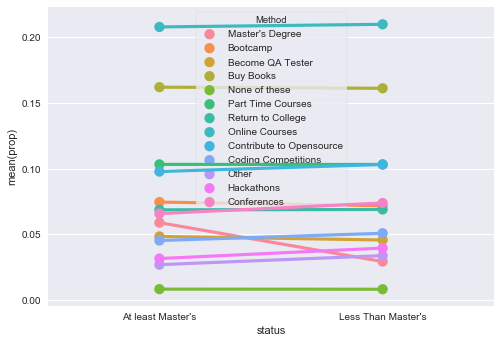

In [69]:
sns.pointplot(data=df_dotplot, x='status', y='prop', hue='Method');


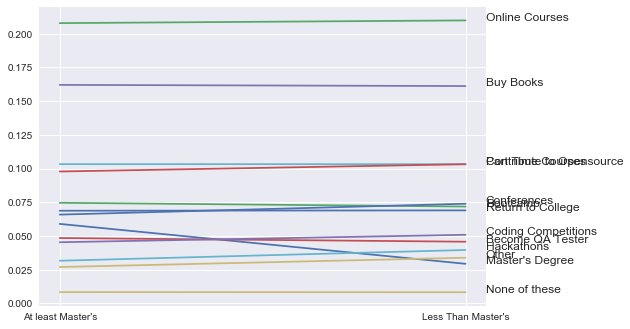

In [77]:
for idx, row in df_dotplot.iterrows():
    plt.plot([0,1],[row["At least Master's"], row["Less Than Master's"]]);
    plt.text(1.05, row["Less Than Master's"], row['Method']);
plt.xticks([0,1], ["At least Master's", "Less Than Master's"]);

In [75]:
for row in df_dotplot:
    print(row)

Method
At least Master's
Less Than Master's
